In [3]:
import os
import csv

os.chdir(r'C:\My\x2\180421\csv')
mypath = os.getcwd()
print(mypath)

infile_name = '180421_merged.csv'

C:\My\x2\180421\csv


In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv(infile_name, sep=',', header=0)

### model - poly reg

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


dataset_X = df[['102 <1> (VDC)']].values / 24.9 * 1000 * 1.5 / 2
dataset_y = df[['101 <ITL900> (VDC)']].values / 24.97 * 1000


dataset_y_header = ['101 <ITL900> (VDC)']
dataset_X_header = [
    '102 <1> (VDC)'
    , '103 <2> (VDC)'
    , '104 <3> (VDC)'
    , '105 <4> (VDC)'
    , '106 <5> (VDC)'
    , '107 <6> (VDC)'
    , '108 <7> (VDC)'
    , '109 <8> (VDC)'
    , '110 <9> (VDC)'
    , '111 <10> (VDC)'
    , '112 <11> (VDC)'
    , '113 <12> (VDC)'
    , '114 <13> (VDC)'
    , '115 <14> (VDC)'
    , '116 <15> (VDC)'
    , '117 <16> (VDC)'
]

# merged all items
dataset_y = pd.concat([df[[dataset_y_header[0]]]]* len(dataset_X_header)).values / 24.97 * 1000
dataset_X = pd.concat([pd.DataFrame(df[[i]].values) for i in dataset_X_header]).values / 25 * 1000 * 1.5 / 2

In [10]:
np.max(dataset_X)

37.74500999999999

In [11]:
np.min(dataset_X)

-0.03898227

In [47]:
dataset_X[-1]

array([37.61226])

In [46]:
dataset_y[-1]

array([66.6609972])

In [7]:
training_set_X, test_set_X, training_set_y, test_set_y = train_test_split(dataset_X, dataset_y, test_size=0.33, random_state=42, shuffle=True)

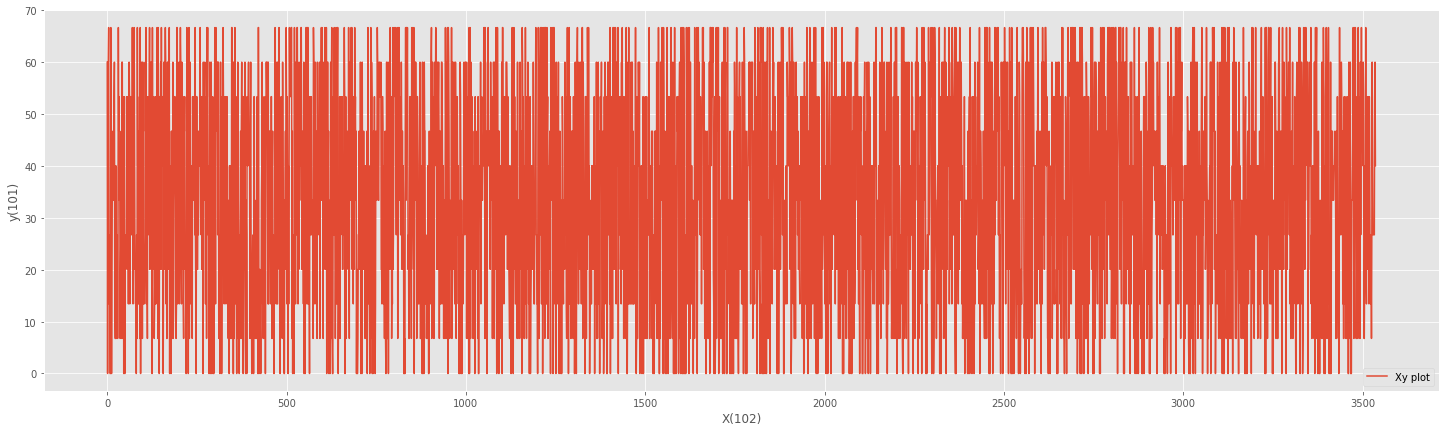

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (25,7)
plt_x = range(len(training_set_X[:, 0]))
plt.plot(plt_x, (training_set_y), label='Xy plot')
plt.xlabel('X(102)')
plt.ylabel('y(101)')
plt.legend()
plt.show()


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(degree=2)
training_set_X_poly_reg = poly.fit_transform(training_set_X)
test_set_X_poly_reg = poly.fit_transform(test_set_X)

model_poly_reg = LinearRegression()
model_poly_reg.fit(training_set_X_poly_reg, training_set_y)
test_set_pred_poly_reg = model_poly_reg.predict(test_set_X_poly_reg)

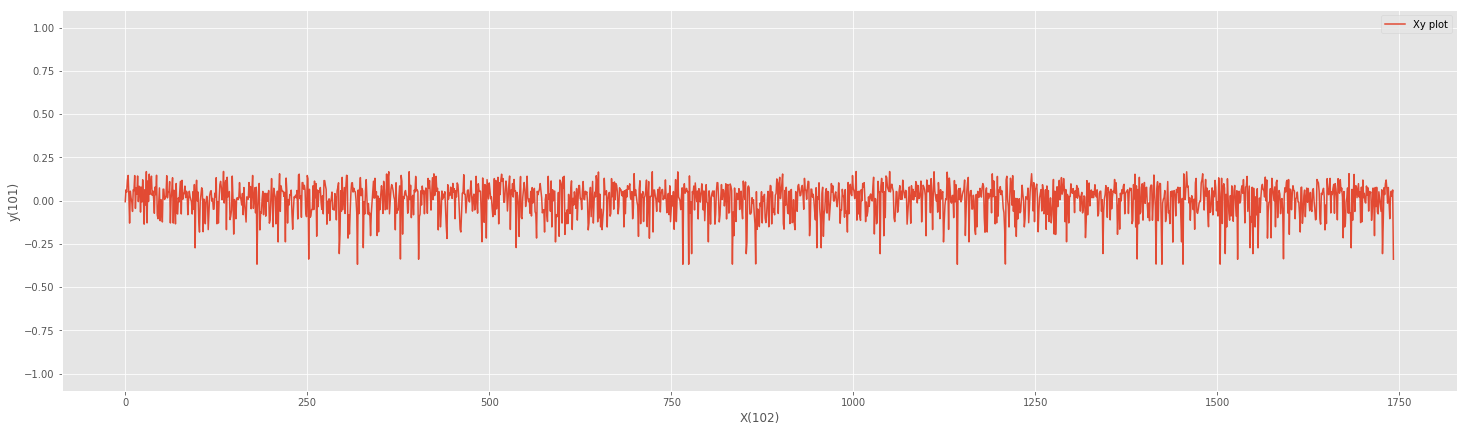

mse: 0.009384866275414502  abs max: 0.3685313638094101  abs avg: 0.07593406405655402


In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (25,7)
plt.ylim(ymax=1.1, ymin=-1.1)
plt_x = range(len(test_set_X[:, 0]))
plt.plot(plt_x, (test_set_y - test_set_pred_poly_reg), label='Xy plot')
plt.xlabel('X(102)')
plt.ylabel('y(101)')
plt.legend()
plt.show()


print('mse:', mean_squared_error(test_set_y, test_set_pred_poly_reg),
      ' abs max:', np.max(np.abs(test_set_y - test_set_pred_poly_reg)),
      ' abs avg:', np.average(np.abs(test_set_y - test_set_pred_poly_reg)))

- mse: 2.693522468176237e-06  abs max: 0.003981919999302086  abs avg: 0.0013822990458470194  // single item // poly3
- mse: 0.009377189466469095  abs max: 0.3749053306721635  abs avg: 0.07577623317994753   // all items // poly3

In [127]:
np.average(np.abs(test_set_y - test_set_pred_poly_reg))

0.07274389142853059

In [132]:
np.std(test_set_y - test_set_pred_poly_reg)

0.09276820040549501

### grid

In [18]:
grid_x_start = -1.
grid_x_end = 45.

In [38]:
grid_x_val, spacing = np.linspace(start=grid_x_start, stop=grid_x_end, num=10000, endpoint=True, retstep=True)

In [39]:
grid_x_val[0]

-1.0

In [40]:
grid_x_val[1]

-0.9953995399539954

In [43]:
grid_x_val_poly_reg = poly.fit_transform(grid_x_val.reshape(-1, 1))
grid_y_val_poly_reg_pred = model_poly_reg.predict(grid_x_val_poly_reg)

In [44]:
grid_y_val_poly_reg_pred

array([[-1.76913511],
       [-1.76095861],
       [-1.75278211],
       ...,
       [79.88345891],
       [79.89161782],
       [79.89977673]])

In [57]:
def get_bound(grid_x_val, input_x, ):
    for i in range(len(grid_x_val)-1):
        if grid_x_val[i] <= input_x and input_x <= grid_x_val[i+1]:
            lower = grid_x_val[i]
            upper = grid_x_val[i+1]
            break      
        
    interval = upper - lower
    ip_b = (upper - input_x) / interval
    ip_a = 1 - ip_b
    return i, i+1, ip_a, ip_b

get_bound(grid_x_val, input_x=3)

(869, 870, 0.4782608695652846, 0.5217391304347154)

In [58]:
def grid_inner_pred(input_x, grid_x_val, grid_y):
    
    lower_idx, upper_idx, ip_a, ip_b = get_bound(grid_x_val, input_x)
    lower_y = grid_y[lower_idx]
    upper_y = grid_y[upper_idx]
    
    return lower_y * ip_a + upper_y * ip_b
    
    

In [59]:
grid_inner_pred(3, grid_x_val, grid_y_val_poly_reg_pred)

array([5.33984735])

In [68]:
xy = np.concatenate((grid_x_val.reshape(-1, 1), grid_y_val_poly_reg_pred), axis=1)

In [70]:
np.savetxt("foo.csv", xy, delimiter=",")

In [71]:
import os
os.getcwd()

'C:\\My\\x2\\180421\\csv'